<h1 style="text-align:center">Free Vibration of a Mass-Spring System <br> with Friction</h1>
<h3 style="text-align:center"> MCHE 485: Mechanical Vibrations</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
http://www.ucs.louisiana.edu/~jev9637/   </p>

<p style="text-align:center">
	<img src="http://shared.crawlab.org/MassSpring_Friction.png" alt="A Mass-Spring System with Friction" width=50%/></a><br>
    <strong> Figure 1: A Mass-Spring System with Friction </strong>
</p>

This notebook simluates the free vibration of a simple mass-spring-damper system like the one shown in Figure 1. The mass in this system is attache to ground via a linear spring, k. The coefficient of friction between mass m and the surface on which it is moving is $\mu$. The position of the mass is described by x(t).

We'll first look at how the system response to non-zero initial conditions. We'll then compare its response to that of a similar system without friction, but with a viscous damper.

The equation of motion for the system is:

$ \quad m \ddot{x} + \mu N sgn(\dot{x}) + kx = 0 $

We could also write this equation in terms of the damping ratio, $\zeta$, and natural frequency $\omega_n$.

$ \quad  \ddot{x} + \frac{\mu N}{m} sgn(\dot{x}) + \omega_n^2x = 0$

For information on how to obtain this equation, you can see the lectures at the [class website](http://www.ucs.louisiana.edu/~jev9637/MCHE485.html).

In [1]:
import numpy as np                        # Grab all of the NumPy functions with nickname np
from scipy.integrate import odeint        

In [2]:
# We want our plots to be displayed inline, not in a separate window
%matplotlib inline 

import matplotlib.pyplot as plt

In [3]:
# Define the System Parameters

m = 1.0                        # mass (kg)
k = (1.0*2.0*np.pi)**2         # spring constant (N/m)
mu = 0.1                       # Friction coefficient
g = 9.81                       # gravity

wn = np.sqrt(k/m)              # natural frequency (rad/s)

In [4]:
# Define the system as a series of 1st order ODES (beginnings of state-space form)
def eq_of_motion(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x, x_dot]
        t :  time
        p :  vector of the parameters:
                  p = [m, k, mu, g]
    """
    x, x_dot = w
    m, k, mu, g = p

    # Create sysODE = (x', x_dot'):
    sysODE = [x_dot,
             (-k * x - mu*m*g*np.sign(x_dot)) / m]
    return sysODE

In [5]:
# Set up simulation parameters 

# ODE solver parameters
abserr = 1.0e-9
relerr = 1.0e-9
max_step = 0.01
stoptime = 10.0
numpoints = 10001

# Create the time samples for the output of the ODE solver
t = np.linspace(0.,stoptime,numpoints)

# Initial conditions
x_init = 1.0                        # initial position
x_dot_init = 0.0                    # initial velocity

# Pack the parameters and initial conditions into arrays 
p = [m, k, mu, g]
x0 = [x_init, x_dot_init]

In [6]:
# Call the ODE solver.
resp = odeint(eq_of_motion, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

# Find the location of the last cycle peaks - we'll use to plot the linear decay envelope
last_min = np.min(resp[:,0]* (t > 9))
last_min_t = t[np.argmin(resp[:,0] * (t > 9))]
last_max = np.max(resp[:,0]* (t > 8.5))
last_max_t = t[np.argmax(resp[:,0]* (t > 8.5))]

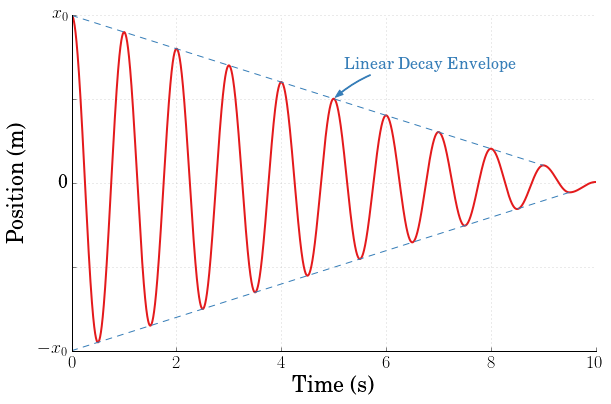

In [7]:
# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel('Time (s)',fontsize=22,weight='bold',labelpad=5)
plt.ylabel('Position (m)',fontsize=22,weight='bold',labelpad=10)
plt.yticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5], ['', r'$-x_0$', '', '0', '', r'$x_0$', ''])

# plot the response
plt.plot(t,resp[:,0],linewidth=2)

# Add the (linear) decay envelopes
plt.plot([0., last_max_t],[x_init, last_max], color = "#377eb8", linewidth=1.0, linestyle="--")
plt.plot([0., last_min_t],[-x_init, last_min], color = "#377eb8", linewidth=1.0, linestyle="--")

plt.annotate(r'Linear Decay Envelope',
         xy=(t[5001],resp[5001,0]), xycoords='data',
         xytext=(+10, +30), textcoords='offset points', fontsize=16,
         arrowprops=dict(arrowstyle="simple, head_width = 0.35, tail_width=0.05", connectionstyle="arc3,rad=.2", color="#377eb8"),color = "#377eb8")

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
# plt.savefig('CoulombDamping_Resp.pdf')

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

## Comparison to Viscous Damping
Let's compare that response to the response from a system with a viscous damper and no friction, like the one in Figure 2.
<p style="text-align:center">
	<img src="http://shared.crawlab.org/MassSpringDamper_FreeVibration.png" alt="A Mass-Spring-Damper System" width=50%/></a><br>
    <strong> Figure 2: A Mass-Spring-Damper System </strong>
</p>

As a reminder, the equation of motion for this system is:

$ \quad m \ddot{x} + c \dot{x} + k x = 0 $

We could also write this equation in terms of the damping ratio, $\zeta$, and natural frequency $\omega_n$.

$ \quad \ddot{x} + 2 \zeta \omega_n \dot{x} + \omega_n^2 x = 0 $

In [8]:
# Set up a system with viscous damping for comparison
z = 0.025               # Define a desired damping ratio 
                        # z=0.025 to try to match first cycles of friction example
    
c = 2*z*wn*m            # calculate the damping coeff. to create it (N/(m/s))

wd = wn*np.sqrt(1-z**2) # Damped natural frequency (rad/s)

# Define the system as a series of 1st order ODES (beginnings of state-space form)
def eq_of_motion_viscous(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x, x_dot]
        t :  time
        p :  vector of the parameters:
                  p = [m, k]
    """
    x, x_dot = w
    m, k = p

    # Create sysODE = (x', x_dot'):
    sysODE = [x_dot,
             (-k*x - c*x_dot) / m]
    return sysODE



# Set up simulation parameters 
# ODE solver parameters
abserr = 1.0e-9
relerr = 1.0e-9
max_step = 0.01
stoptime = 10.0
numpoints = 10001


# Initial conditions
x_init = 1.0                        # initial position
x_dot_init = 0.0                    # initial velocity

# Pack the parameters and initial conditions into arrays:
p = [m, k]
x0 = [x_init, x_dot_init]

# Call the ODE solver.
resp_damped = odeint(eq_of_motion_viscous, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

Now, let's compare this response to that with dry friction (Coulomb Damping).

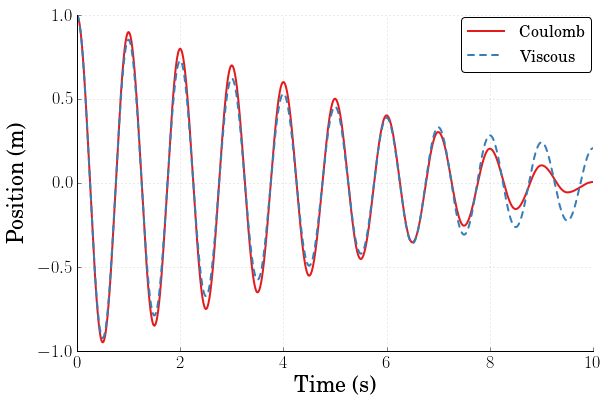

In [9]:
# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel('Time (s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel('Position (m)',family='serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(t,resp[:,0], linewidth=2, linestyle = '-', label='Coulomb')
plt.plot(t,resp_damped[:,0], linewidth=2, linestyle = '--', label='Viscous')

# You may need to change your plot limits
# plt.xlim(0,5)
# plt.ylim(0,7)

leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts() 
plt.setp(ltext,family='Serif',fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# plt.savefig('DampingComparison_Resp.pdf')

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

## (By Request) What if we have both viscous damping and friction?

Let's look at a system that has both a viscous damper and friction, like the one shown in Figure 3.

<p style="text-align:center">
	<img src="http://shared.crawlab.org/MassSpringDamper_Friction.png" alt="A Mass-Spring-Damper System with Friction" width=50%/></a><br>
    <strong> Figure 3: A Mass-Spring-Damper System with Fricion</strong>
</p>

It's equation of motion is:

$ \quad m \ddot{x} + c \dot{x} + \mu N sgn(\dot{x}) + k x = 0 $

We could also write this equation in terms of the damping ratio, $\zeta$, and natural frequency $\omega_n$.

$ \quad \ddot{x} + 2 \zeta \omega_n \dot{x} + + \frac{\mu N}{m} sgn(\dot{x}) + \omega_n^2 x = 0 $

You can look at which form of damping is dominant by looking at the shape of the decay envelope. Change the values of $ \mu $ and $\zeta$ in the code block below to investigate.

In [10]:
# Redefine the system parameters

m = 1.0                        # mass (kg)
k = (1.0 * 2.0*np.pi)**2       # spring constant (N/m)
mu = 0.025                     # Friction coefficient
g = 9.81                       # gravity

wn = np.sqrt(k/m)              # natural frequency (rad/s)

# Set up a system with viscous damping for comparison
z = 0.02                # Define a desired damping ratio
c = 2*z*wn*m            # calculate the damping coeff. to create it (N/(m/s))

wd = wn*np.sqrt(1-z**2) # Damped natural frequency (rad/s)



# Define the system as a series of 1st order ODES (beginnings of state-space form)
def eq_of_motion_both(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x, x_dot]
        t :  time
        p :  vector of the parameters:
                  p = [m, k, mu, g]
    """
    x, x_dot = w
    m, k, mu, g = p

    # Create sysODE = (x', x_dot'):
    sysODE = [x_dot,
             (-k * x - mu*m*g*np.sign(x_dot) - c*x_dot) / m]
    return sysODE

# Set up simulation parameters 
# ODE solver parameters
abserr = 1.0e-9
relerr = 1.0e-9
max_step = 0.01
stoptime = 10.0
numpoints = 10001


# Initial conditions
x_init = 1.0                        # initial position
x_dot_init = 0.0                    # initial velocity

# Pack the parameters and initial conditions into arrays 
p = [m, k, mu, g]
x0 = [x_init, x_dot_init]

# Call the ODE solver.
resp_both = odeint(eq_of_motion_both, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

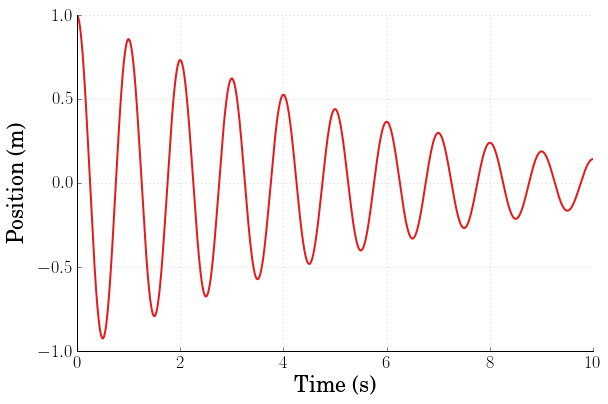

In [11]:
# Now, let's plot the results

# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel('Time (s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel('Position (m)',family='serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(t,resp_both[:,0], linewidth=2, linestyle = '-', label='Viscous and Friction')

# You may need to change your plot limits
# plt.xlim(0,5)
# plt.ylim(0,7)

# leg = plt.legend(loc='upper right', fancybox=True)
# ltext  = leg.get_texts() 
# plt.setp(ltext,family='Serif',fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# plt.savefig('FrictionAndViscous_Resp.pdf')

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

<hr class = "style-end">

#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.

In [12]:
# Ignore this cell - We just update the CSS to make the notebook look a little bit better and easier to read

# Improve the notebook styling -- Run this first
from IPython.core.display import HTML
css_file = 'styling/CRAWLAB_IPythonNotebook.css'
HTML(open(css_file, "r").read())